In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Read the CSV file
df = pd.read_csv('../datasets/all_trips.csv')
df.head()

,ride_id,started_at,ended_at,start_station_id,end_station_id,ride_duration,distance
0,322BD23D287743ED,2020-08-20 18:08:14,2020-08-20 18:17:51,329.0,141.0,9.616667,1.884479
1,2A3AEF1AB9054D8B,2020-08-27 18:46:04,2020-08-27 19:54:51,168.0,168.0,68.783333,0.000000
2,67DC1D133E8B5816,2020-08-26 19:44:14,2020-08-26 21:53:07,195.0,44.0,128.883333,0.679841
3,C79FBBD412E578A7,2020-08-27 12:05:41,2020-08-27 12:53:45,81.0,47.0,48.066667,0.573236
4,13814D3D661ECADB,2020-08-27 16:49:02,2020-08-27 16:59:49,658.0,658.0,10.783333,0.000000


## 1. Number of Rides per time

### Rides per Hour

In [186]:
# Convert 'started_at' to datetime
df['started_at'] = pd.to_datetime(df['started_at'])

# Extract the date and hour from 'started_at'
df['date'] = df['started_at'].dt.date
df['hour'] = df['started_at'].dt.hour
# Extract the date and 15-minute intervals
df['15_min_interval'] = df['started_at'].dt.floor('15min')

# Define the start of the day
start_of_day = pd.to_datetime("2020-08-20 00:00:00")

df.head()

,ride_id,started_at,ended_at,start_station_id,end_station_id,ride_duration,distance,date,hour,15_min_interval
0,322BD23D287743ED,2020-08-20 18:08:14,2020-08-20 18:17:51,329.0,141.0,9.616667,1.884479,2020-08-20,18,2020-08-20 18:00:00
1,2A3AEF1AB9054D8B,2020-08-27 18:46:04,2020-08-27 19:54:51,168.0,168.0,68.783333,0.000000,2020-08-27,18,2020-08-27 18:45:00
2,67DC1D133E8B5816,2020-08-26 19:44:14,2020-08-26 21:53:07,195.0,44.0,128.883333,0.679841,2020-08-26,19,2020-08-26 19:30:00
3,C79FBBD412E578A7,2020-08-27 12:05:41,2020-08-27 12:53:45,81.0,47.0,48.066667,0.573236,2020-08-27,12,2020-08-27 12:00:00
4,13814D3D661ECADB,2020-08-27 16:49:02,2020-08-27 16:59:49,658.0,658.0,10.783333,0.000000,2020-08-27,16,2020-08-27 16:45:00


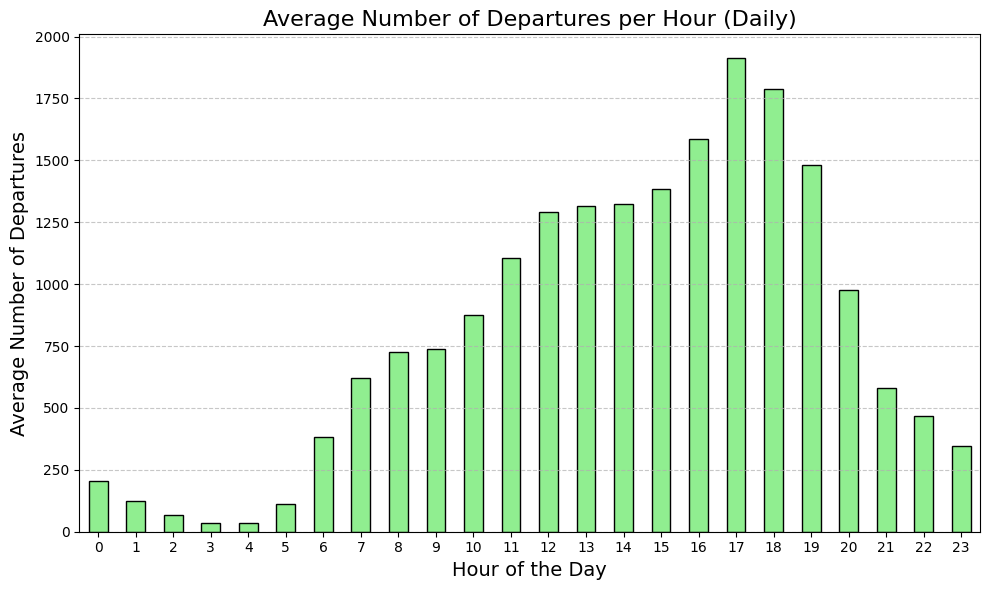

In [187]:
# Group by date and hour, and count the number of rides per hour for each day
rides_per_hour_per_day = df.groupby(['date', 'hour']).size().reset_index(name='rides')

# Calculate the average number of departures per hour across all days
avg_departures_per_hour = rides_per_hour_per_day.groupby('hour')['rides'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_departures_per_hour.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add labels and title
plt.title("Average Number of Departures per Hour (Daily)", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Average Number of Departures", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


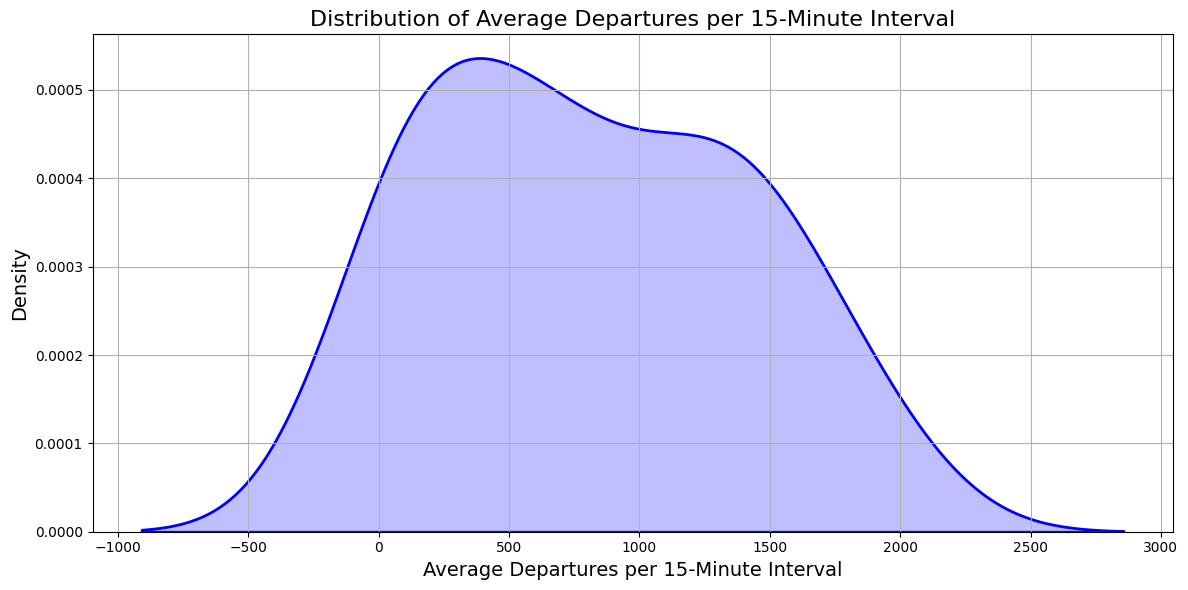

In [188]:
# Plotting the distribution
plt.figure(figsize=(12, 6))

# Create a seaborn KDE plot
sns.kdeplot(avg_departures_per_hour, color='blue', fill=True, linewidth=2)

#sns.displot(avg_departures, kind="kde")

# Add labels and title
plt.title("Distribution of Average Departures per 15-Minute Interval", fontsize=16)
plt.xlabel("Average Departures per 15-Minute Interval", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


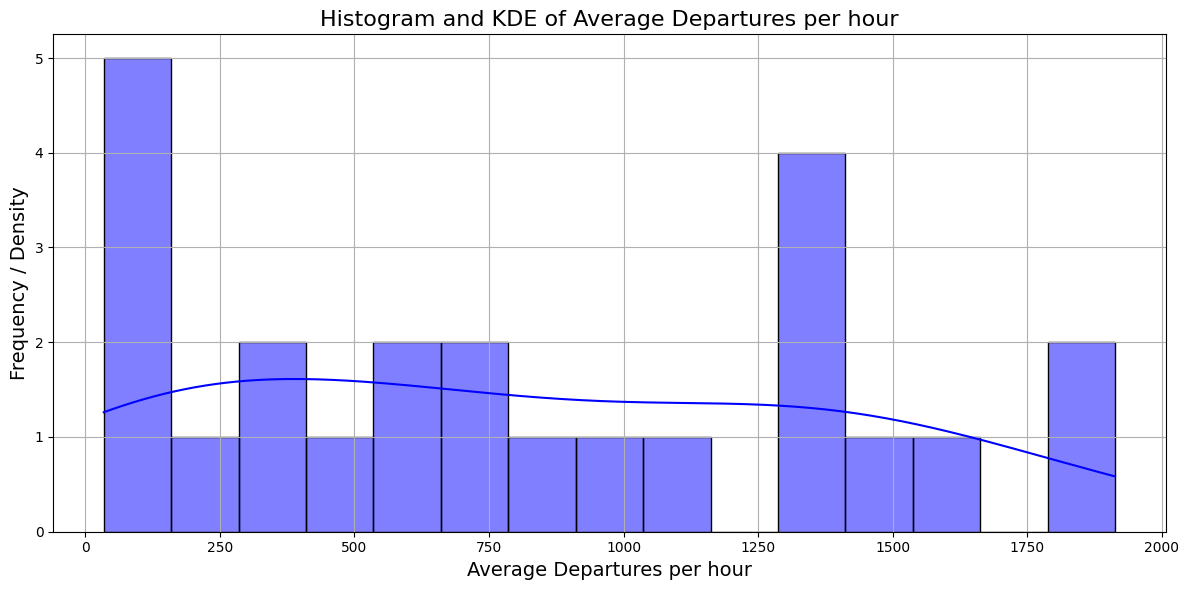

In [189]:
# Plotting histogram and KDE together
plt.figure(figsize=(12, 6))

# Plot histogram
sns.histplot(avg_departures_per_hour, bins=15, kde=True, color='blue', edgecolor='black')

# Add labels and title
plt.title("Histogram and KDE of Average Departures per hour", fontsize=16)
plt.xlabel("Average Departures per hour", fontsize=14)
plt.ylabel("Frequency / Density", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


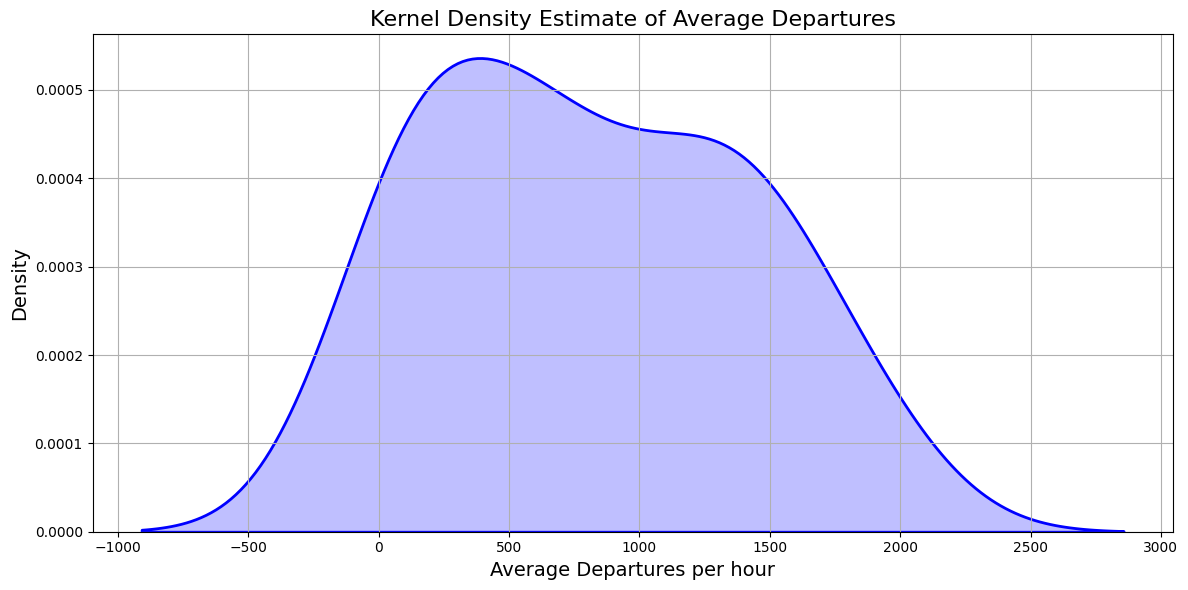

Predicted next ride time (departures per hour): 701.7820644034441
Predicted next ride will occur at: 2020-08-20 11:41:46.923864206


In [190]:
# Fit a Kernel Density Estimate (KDE) to the average departures
kde = gaussian_kde(avg_departures_per_hour)

# Plot the KDE for visualization
plt.figure(figsize=(12, 6))
sns.kdeplot(avg_departures_per_hour, color='blue', fill=True, linewidth=2)
plt.title("Kernel Density Estimate of Average Departures", fontsize=16)
plt.xlabel("Average Departures per hour", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sample from the KDE to predict the next ride time (probabilistic random number)
random_departure = kde.resample(1)  # Sample one value
print(f"Predicted next ride time (departures per hour): {random_departure[0][0]}")

# Assuming the random_departure is in minutes, calculate next time
time_shift = pd.Timedelta(minutes=random_departure[0][0])  # Later, multiply by 15 minutes if needed
next_ride_time = start_of_day + time_shift

print(f"Predicted next ride will occur at: {next_ride_time}")


### Rides per 15 minutes interval

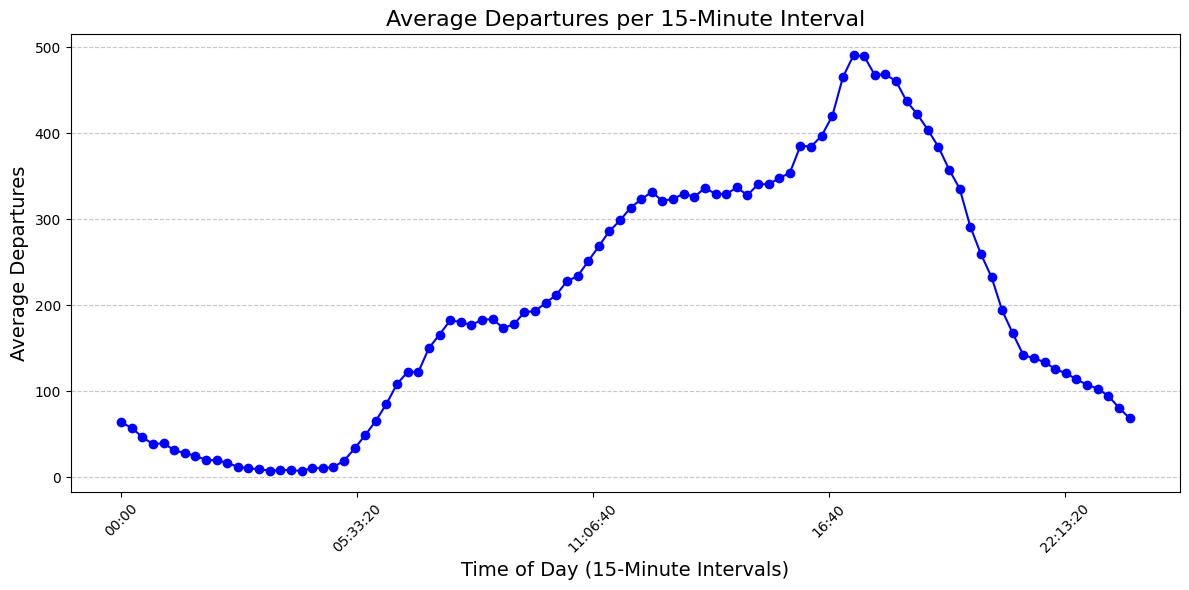

In [191]:
# Group by date and 15-minute intervals, and count the number of departures
departures_per_interval = df.groupby(['date', '15_min_interval']).size().reset_index(name='departures')

# Extract only the time part for 15-minute intervals
departures_per_interval['time'] = departures_per_interval['15_min_interval'].dt.time

# Group by time (15-minute intervals) and compute the average departures across all days
avg_departures_per_15min = departures_per_interval.groupby('time')['departures'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_departures_per_15min.plot(kind='line', color='blue', marker='o', linestyle='-')

# Add labels and title
plt.title("Average Departures per 15-Minute Interval", fontsize=16)
plt.xlabel("Time of Day (15-Minute Intervals)", fontsize=14)
plt.ylabel("Average Departures", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


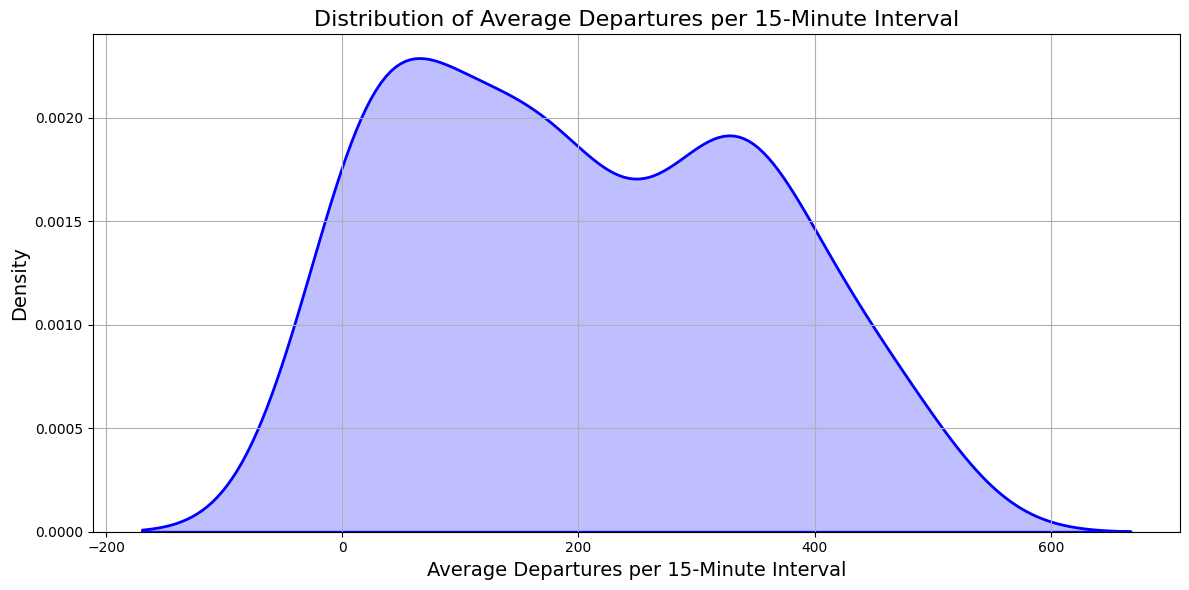

In [192]:
# Plotting the distribution
plt.figure(figsize=(12, 6))

# Create a seaborn KDE plot
sns.kdeplot(avg_departures_per_15min, color='blue', fill=True, linewidth=2)

#sns.displot(avg_departures, kind="kde")

# Add labels and title
plt.title("Distribution of Average Departures per 15-Minute Interval", fontsize=16)
plt.xlabel("Average Departures per 15-Minute Interval", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


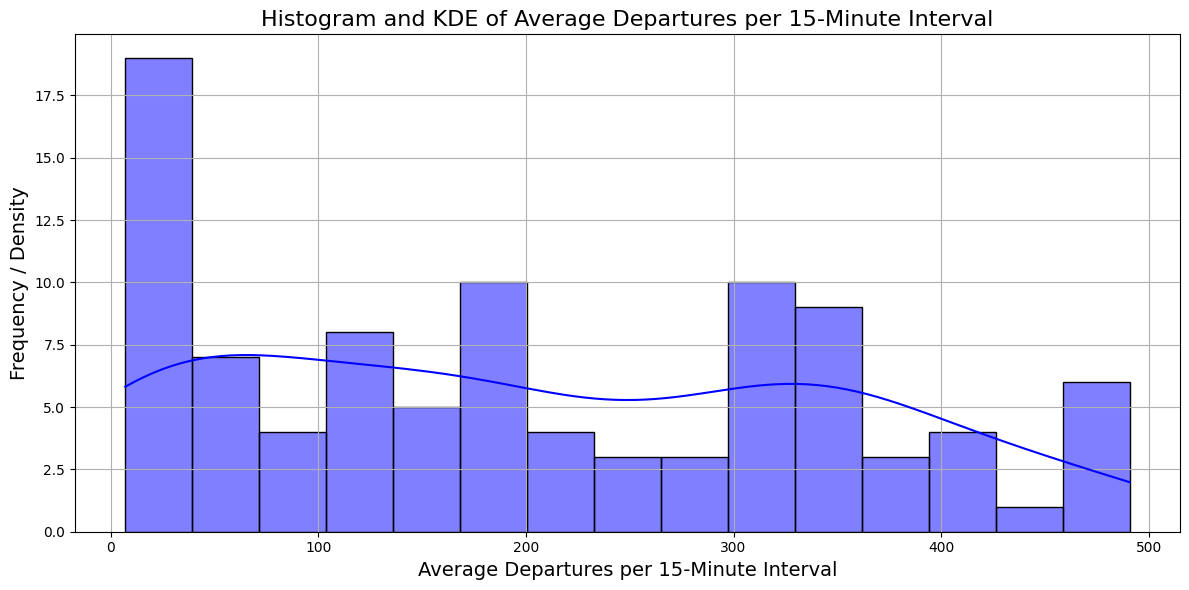

In [193]:
# Plotting histogram and KDE together
plt.figure(figsize=(12, 6))

# Plot histogram
sns.histplot(avg_departures_per_15min, bins=15, kde=True, color='blue', edgecolor='black')

# Add labels and title
plt.title("Histogram and KDE of Average Departures per 15-Minute Interval", fontsize=16)
plt.xlabel("Average Departures per 15-Minute Interval", fontsize=14)
plt.ylabel("Frequency / Density", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


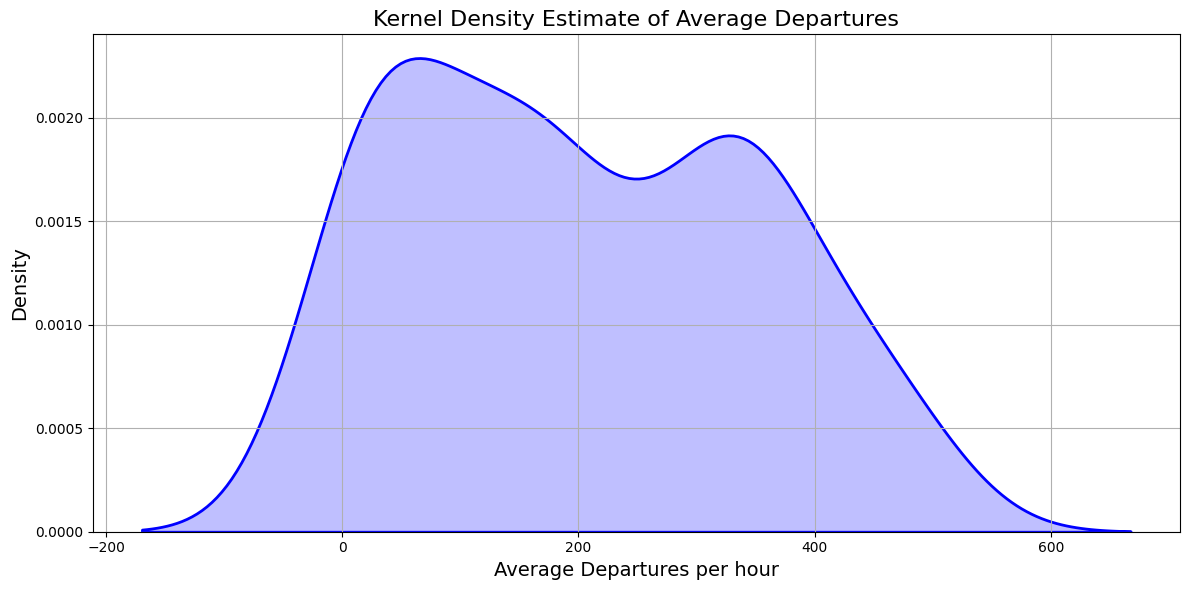

Predicted next ride time (departures per hour): 72.18303390699162
Predicted next ride will occur at: 2020-08-20 18:02:44.730516292


In [194]:
# Fit a Kernel Density Estimate (KDE) to the average departures
kde = gaussian_kde(avg_departures_per_15min)

# Plot the KDE for visualization
plt.figure(figsize=(12, 6))
sns.kdeplot(avg_departures_per_15min, color='blue', fill=True, linewidth=2)
plt.title("Kernel Density Estimate of Average Departures", fontsize=16)
plt.xlabel("Average Departures per hour", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sample from the KDE to predict the next ride time (probabilistic random number)
random_departure = kde.resample(1)  # Sample one value
print(f"Predicted next ride time (departures per hour): {random_departure[0][0]}")

# Assuming the random_departure is in minutes, calculate next time
time_shift = pd.Timedelta(minutes=random_departure[0][0] * 15)
next_ride_time = start_of_day + time_shift

print(f"Predicted next ride will occur at: {next_ride_time}")


## 2. Average Ride Duration per time

### Ride duration per hour

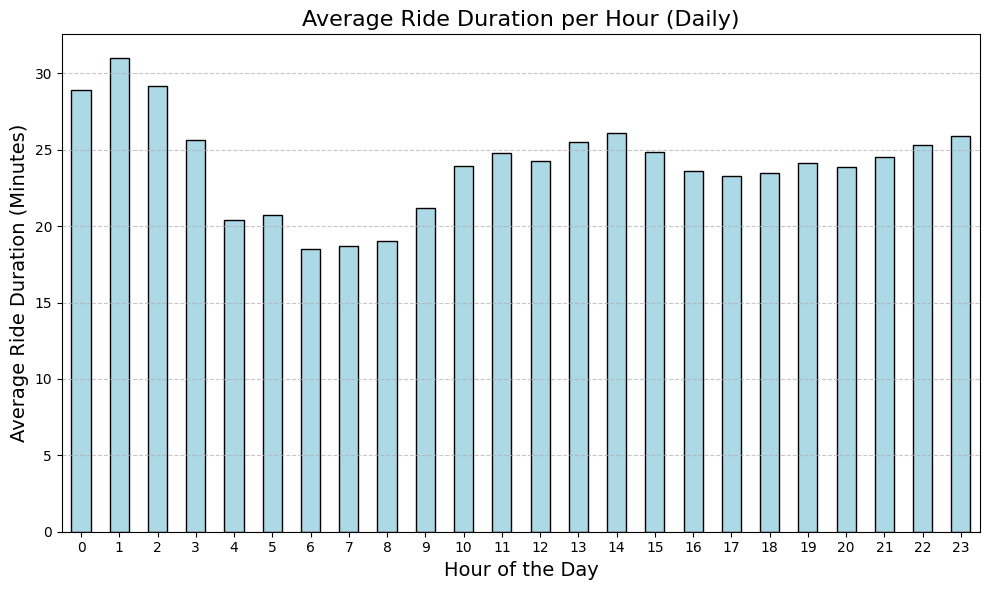

In [195]:
rides_per_hour_per_day = df.groupby(['date', 'hour'])['ride_duration'].mean().reset_index(name='avg_ride_duration')

# Calculate the average ride duration per hour across all days
avg_ride_duration_per_hour = rides_per_hour_per_day.groupby('hour')['avg_ride_duration'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_ride_duration_per_hour.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.title("Average Ride Duration per Hour (Daily)", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Average Ride Duration (Minutes)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


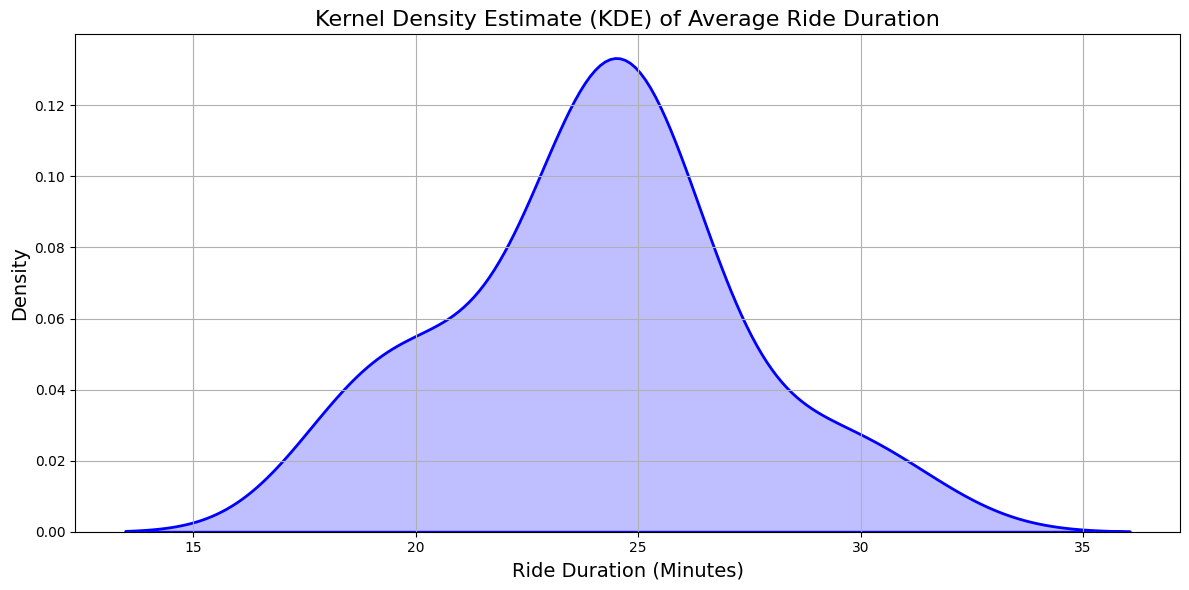

The next predicted ride duration based on KDE is: 26.51 minutes


In [196]:
# 1. Fit a Kernel Density Estimate (KDE)
kde = gaussian_kde(avg_ride_duration_per_hour)

# 2. Create a range of values to plot the KDE (for visualization)
x_vals = np.linspace(min(avg_ride_duration_per_hour), max(avg_ride_duration_per_hour), 1000)

# 3. Plot the KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(avg_ride_duration_per_hour, fill=True, color="blue", linewidth=2)
plt.title("Kernel Density Estimate (KDE) of Average Ride Duration", fontsize=16)
plt.xlabel("Ride Duration (Minutes)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Sample the next ride duration based on the KDE
next_ride_duration = kde.resample(1)  # Sample 1 value from the KDE
next_ride_duration_value = next_ride_duration[0][0]  # Extract the single value

# Output the next ride duration
print(f"The next predicted ride duration based on KDE is: {next_ride_duration_value:.2f} minutes")


### Ride duration per 15 minutes interval

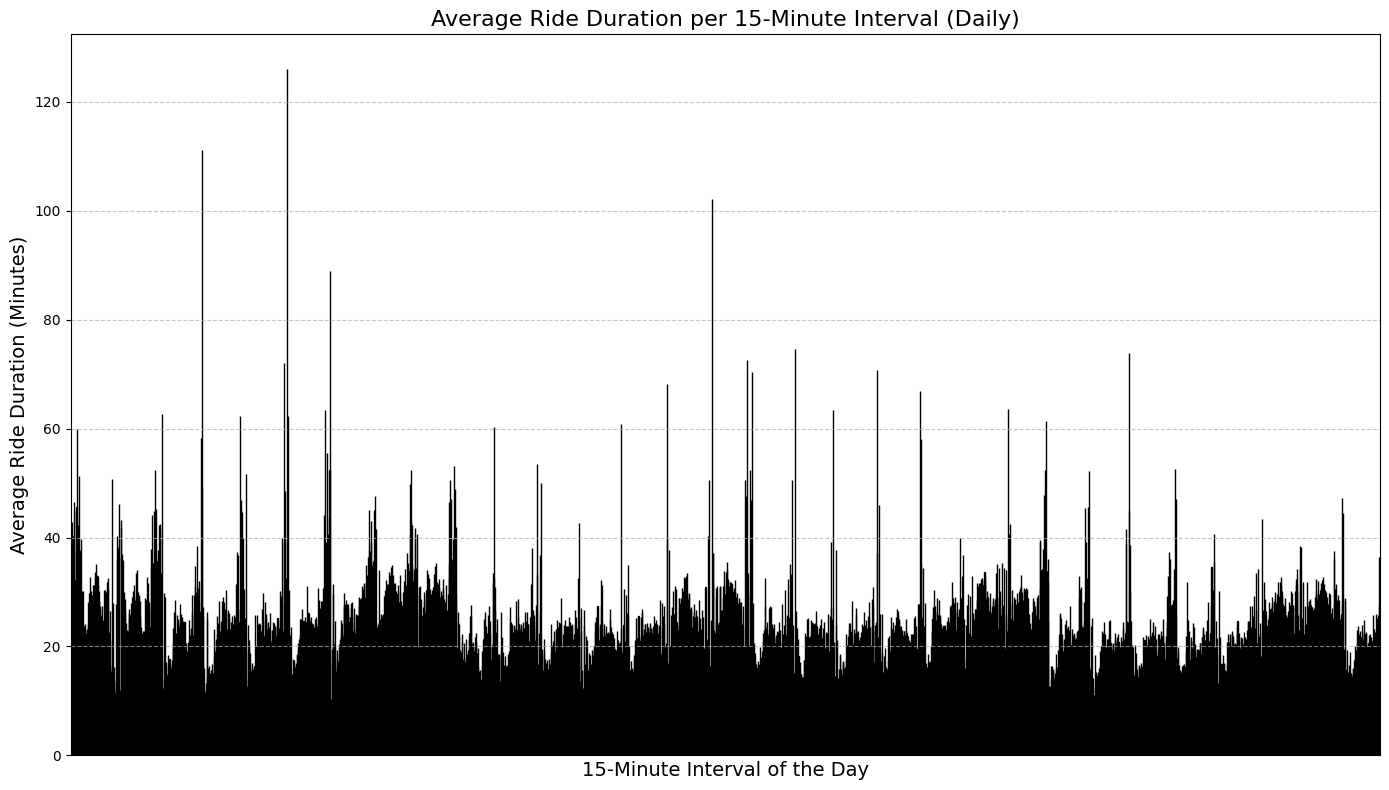

In [197]:
# Extract the 15-minute interval from 'started_at' by rounding the time to the nearest 15 minutes
df['15_min_interval'] = df['started_at'].dt.floor('15min')

# Group by date and 15-minute interval, and calculate the average ride duration for each interval
rides_per_15min_per_day = df.groupby(['date', '15_min_interval'])['ride_duration'].mean().reset_index(name='avg_ride_duration')

# Calculate the average ride duration per 15-minute interval across all days
avg_ride_duration_per_15min = rides_per_15min_per_day.groupby('15_min_interval')['avg_ride_duration'].mean()

# Plotting
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
avg_ride_duration_per_15min.plot(kind='bar', color='lightcoral', edgecolor='black', width=0.05)

# Add labels and title
plt.title("Average Ride Duration per 15-Minute Interval (Daily)", fontsize=16)
plt.xlabel("15-Minute Interval of the Day", fontsize=14)
plt.ylabel("Average Ride Duration (Minutes)", fontsize=14)

# Remove x-axis labels
plt.xticks([])  # This will remove the x-axis labels

# Improve grid visibility and style
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


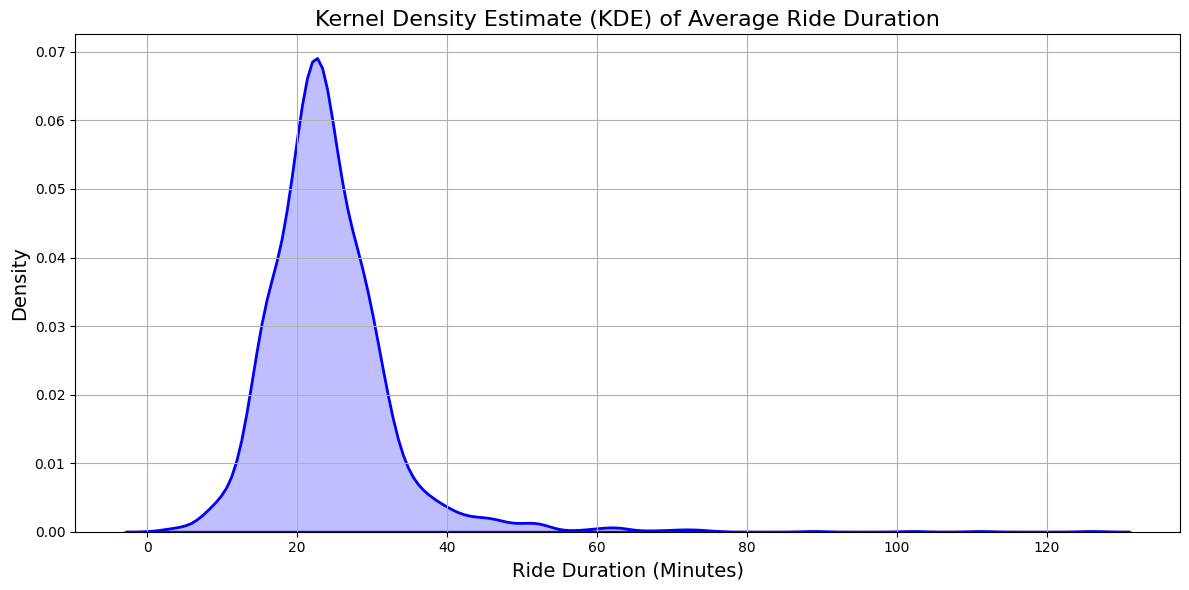

The next predicted ride duration based on KDE is: 30.70 minutes


In [198]:
# 1. Fit a Kernel Density Estimate (KDE)
kde = gaussian_kde(avg_ride_duration_per_15min)

# 2. Create a range of values to plot the KDE (for visualization)
x_vals = np.linspace(min(avg_ride_duration_per_15min), max(avg_ride_duration_per_15min), 1000)

# 3. Plot the KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(avg_ride_duration_per_15min, fill=True, color="blue", linewidth=2)
plt.title("Kernel Density Estimate (KDE) of Average Ride Duration", fontsize=16)
plt.xlabel("Ride Duration (Minutes)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Sample the next ride duration based on the KDE
next_ride_duration = kde.resample(1)  # Sample 1 value from the KDE
next_ride_duration_value = next_ride_duration[0][0]  # Extract the single value

# Output the next ride duration
print(f"The next predicted ride duration based on KDE is: {next_ride_duration_value:.2f} minutes")
